In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from pandas.api.types import CategoricalDtype

In [2]:
df = pd.read_csv('../data/diabetes_data_cleaned.csv')

In [3]:
diabetes_cleaned = df.iloc[:, 1:]  # Exclude the first column by selecting all others
diabetes_cleaned.head()

,gender,hypertension,diabetes_pedigree_function,diet_type,BMI,family_diabetes_history,social_media_usage,physical_activity_level,sleep_duration,stress_level,pregnancies,alcohol_consumption,age_group,weight,diabetes
0,female,0.0,0.370000,paleo,27.0,0.0,Occasionally,Sedentary,2.0,Low,0.0,light,35-49,89.675138,1.0
1,male,0.0,0.730000,Unknown,17.1,0.0,Occasionally,Lightly Active,5.4,Moderate,0.0,none,50-64,70.987148,1.0
2,female,0.0,0.501592,Unknown,22.5,0.0,Occasionally,Lightly Active,7.6,Low,0.0,light,18-34,62.504978,1.0
3,Unknown,0.0,0.550000,carnivore,27.0,0.0,Occasionally,Sedentary,7.7,Unknown,0.0,heavy,50-64,81.510482,1.0
4,male,0.0,0.430000,low carb,27.0,0.0,Excessive,Lightly Active,4.7,Moderate,0.0,moderate,50-64,68.401674,1.0


In [4]:
# Basic statistics
diabetes_cleaned.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
hypertension,80242.0,0.161437,0.367936,0.0,0.000000,0.000000,0.00,1.000000
diabetes_pedigree_function,80242.0,0.501592,0.155630,0.2,0.390000,0.501592,0.62,0.800000
BMI,80242.0,26.981163,5.270489,12.9,24.100000,27.000000,29.90,40.900000
family_diabetes_history,80242.0,0.241283,0.427864,0.0,0.000000,0.000000,0.00,1.000000
sleep_duration,80242.0,5.147617,1.805764,2.0,4.100000,5.300000,6.60,7.700000
pregnancies,80242.0,0.606515,1.185177,0.0,0.000000,0.000000,1.00,5.000000
weight,80242.0,78.887943,17.769213,51.5,68.401674,73.527263,93.80,111.356836
diabetes,80242.0,0.954936,0.207445,0.0,1.000000,1.000000,1.00,1.000000


In [5]:
# Null values
diabetes_cleaned.isnull().sum()

gender                        0
hypertension                  0
diabetes_pedigree_function    0
diet_type                     0
BMI                           0
family_diabetes_history       0
social_media_usage            0
physical_activity_level       0
sleep_duration                0
stress_level                  0
pregnancies                   0
alcohol_consumption           0
age_group                     0
weight                        0
diabetes                      0
dtype: int64

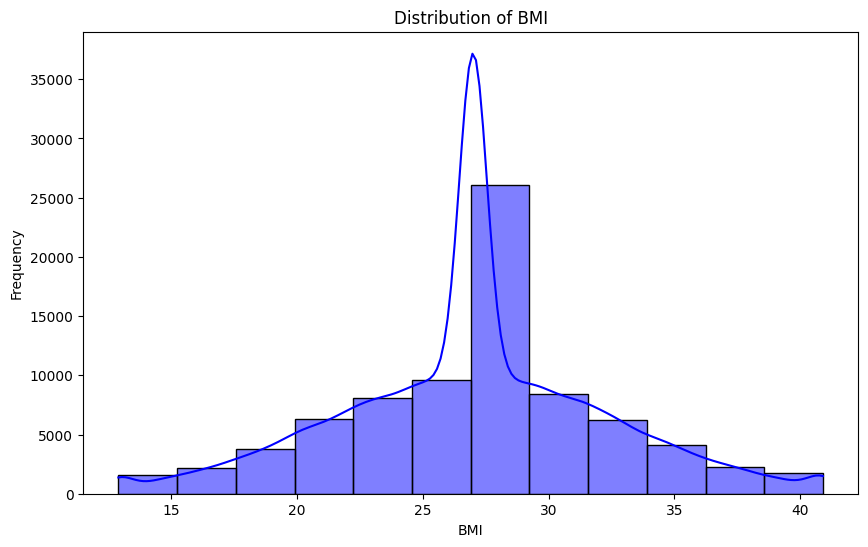

In [6]:
plt.figure(figsize=(10, 6))
sns.histplot(diabetes_cleaned['BMI'], bins=12, kde=True, color='blue')
plt.title('Distribution of BMI')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()

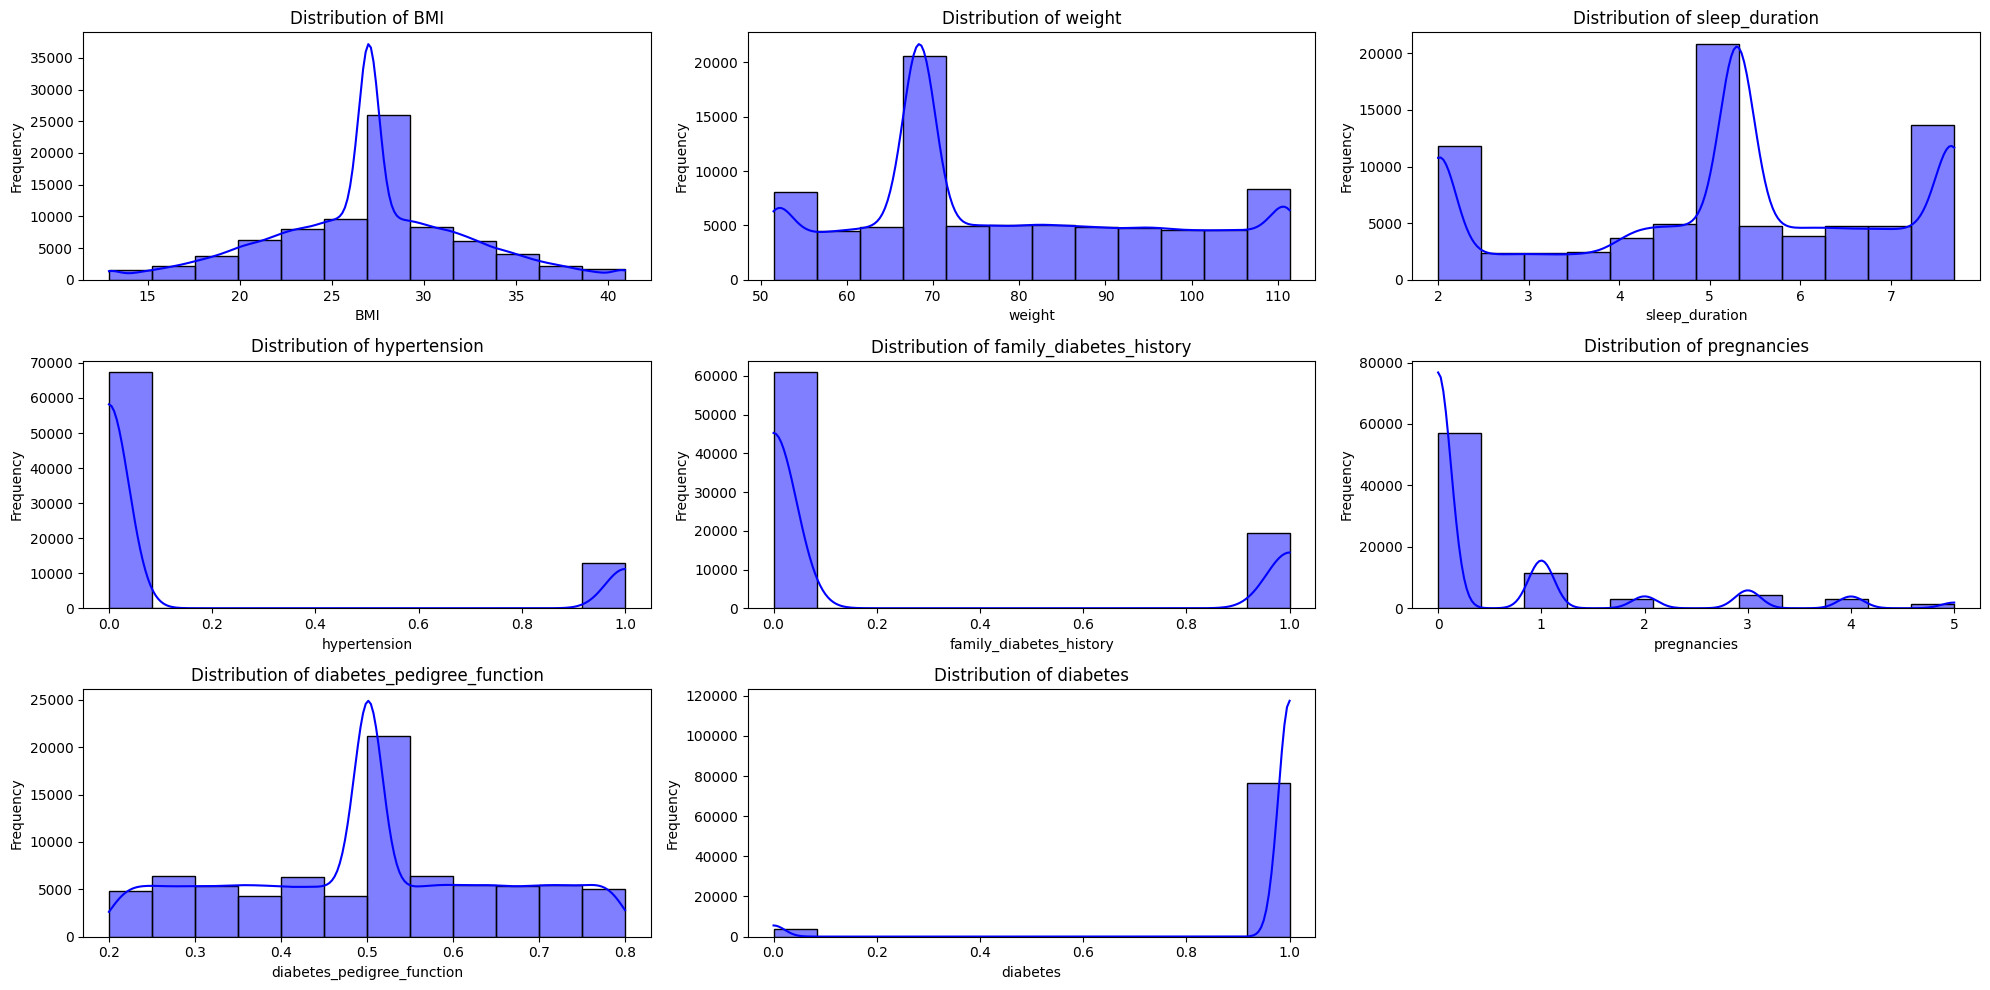

In [7]:
numerical_cols = ['BMI', 'weight', 'sleep_duration', 'hypertension', 'family_diabetes_history', 'pregnancies', 'diabetes_pedigree_function', 'diabetes']

plt.figure(figsize=(20, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)
    sns.histplot(diabetes_cleaned[col], kde=True, color='blue', bins=12)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

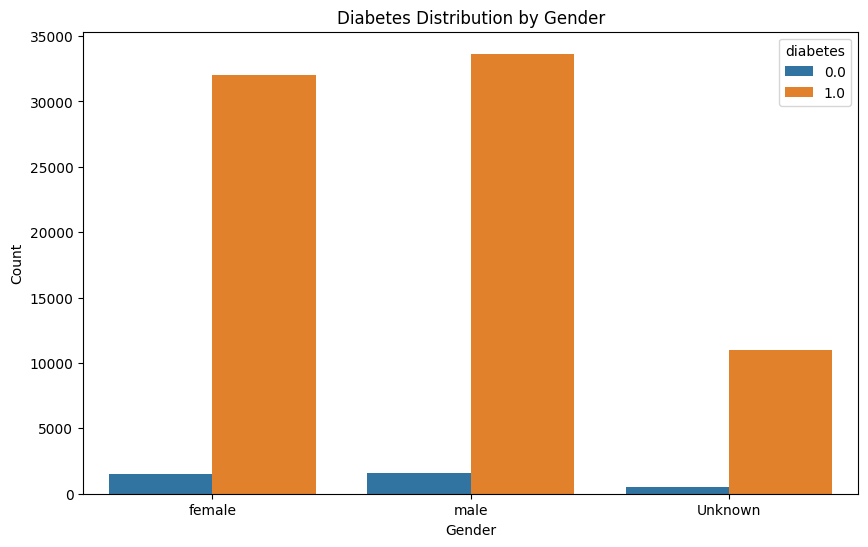

In [8]:
plt.figure(figsize=(10, 6))
sns.countplot(data=diabetes_cleaned, x='gender', hue='diabetes')
plt.title('Diabetes Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

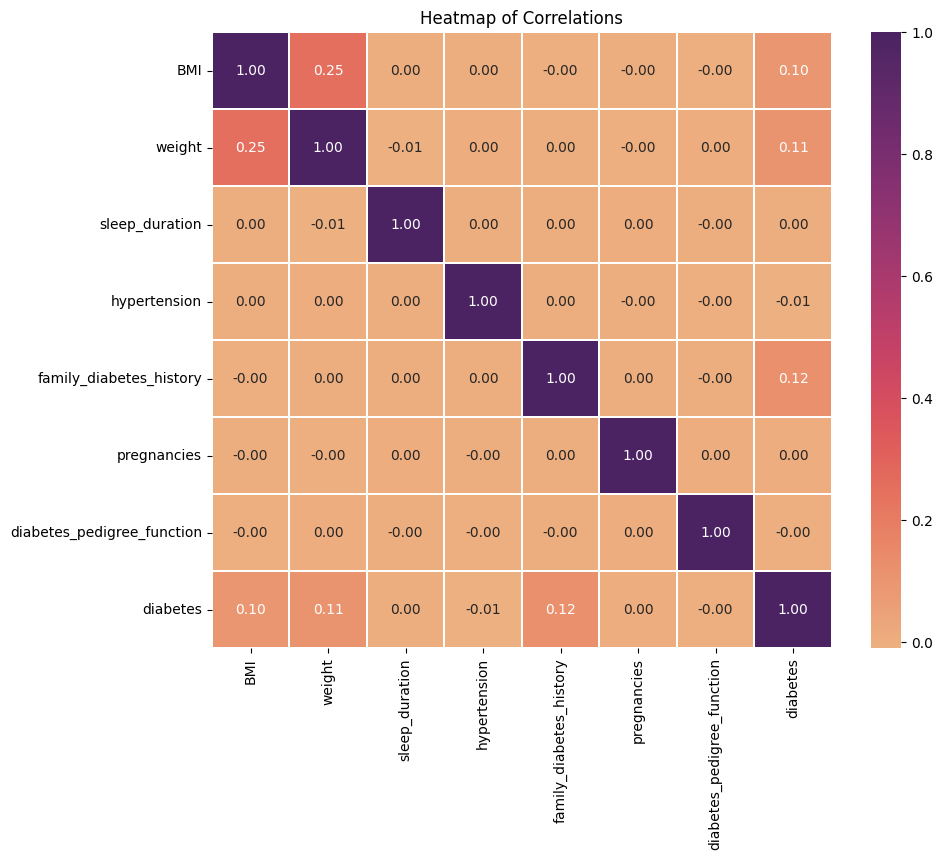

In [9]:
numerical_cols = ['BMI', 'weight', 'sleep_duration', 'hypertension', 'family_diabetes_history', 'pregnancies', 'diabetes_pedigree_function', 'diabetes']

plt.figure(figsize=(10, 8))
sns.heatmap(diabetes_cleaned[numerical_cols].corr(), annot=True, fmt=".2f", cmap="flare", linewidths=0.2)
plt.title('Heatmap of Correlations')
plt.show()

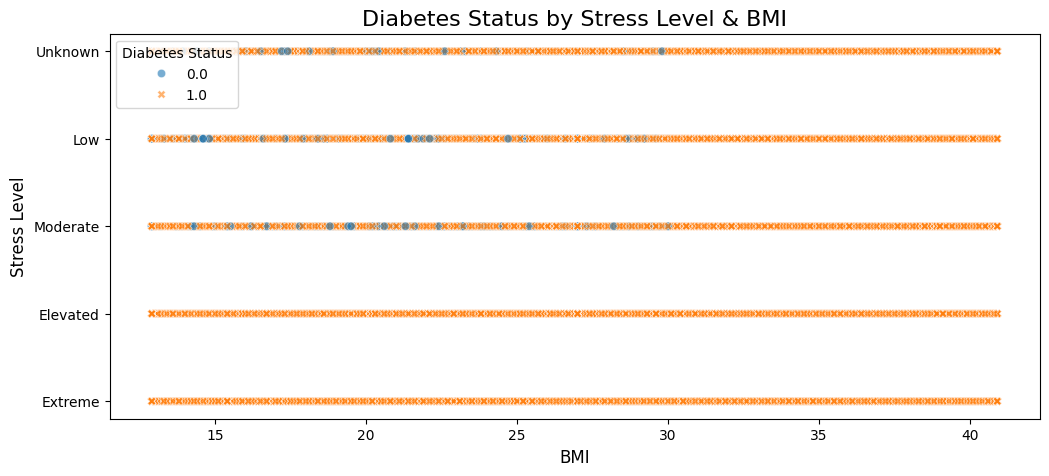

In [10]:
# Define custom order for stress levels
stress_order = CategoricalDtype(categories=['Unknown', 'Low', 'Moderate', 'Elevated', 'Extreme'], ordered=True)

df_stress_ordered = diabetes_cleaned

# Convert the stress_level column to the ordered categorical type
df_stress_ordered['stress_level'] = df['stress_level'].astype(stress_order)

plt.figure(figsize=(12, 5))
sns.scatterplot(
    data=df_stress_ordered,
    x='BMI',
    y='stress_level',
    hue='diabetes',
    alpha=0.6,
    style='diabetes',  # Different markers for diabetic status
    markers=["o", "X"]
)

# Titles and labels
plt.title('Diabetes Status by Stress Level & BMI', fontsize=16)
plt.xlabel('BMI', fontsize=12)
plt.ylabel('Stress Level', fontsize=12)
plt.legend(title='Diabetes Status', loc='upper left')
plt.show()


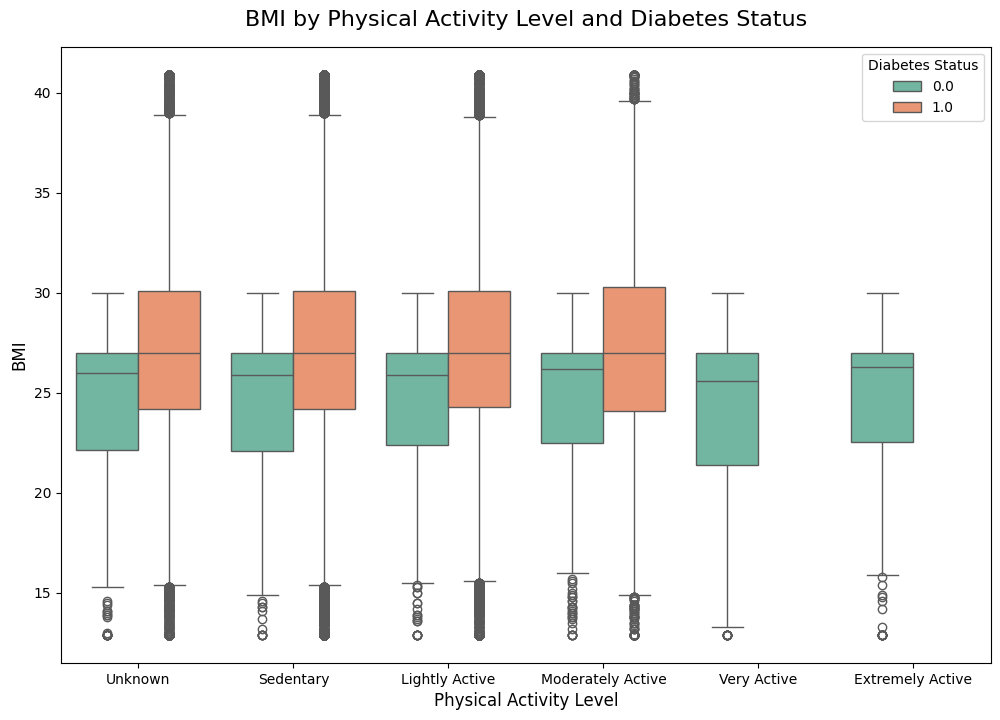

In [11]:
plt.figure(figsize=(12, 8))
sns.boxplot(
    data=diabetes_cleaned,
    x='physical_activity_level',
    y='BMI',
    hue='diabetes',
    palette="Set2",
    order=['Unknown', 'Sedentary', 'Lightly Active', 'Moderately Active', 'Very Active', 'Extremely Active']
)

# Add titles and labels
plt.title('BMI by Physical Activity Level and Diabetes Status', fontsize=16, pad=15)
plt.xlabel('Physical Activity Level', fontsize=12)
plt.ylabel('BMI', fontsize=12)
plt.legend(title='Diabetes Status', loc='upper right', fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

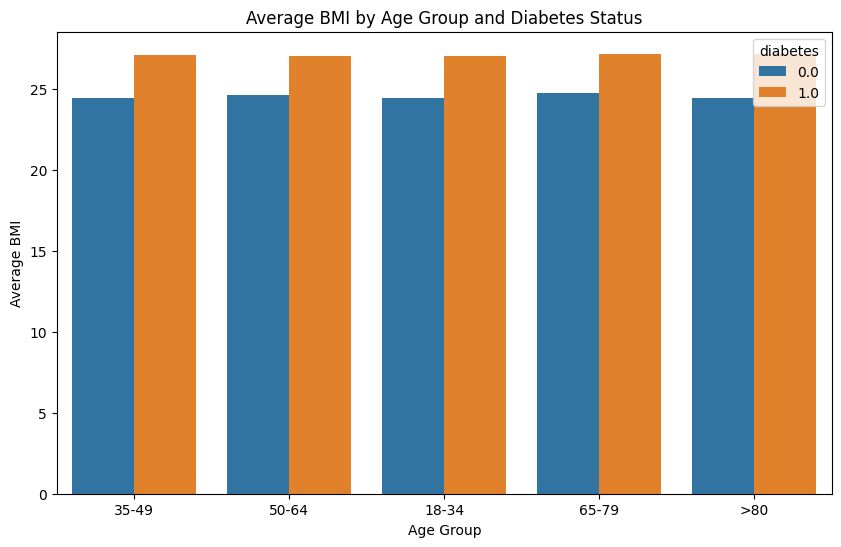

In [12]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='age_group', y='BMI', hue='diabetes', ci=None)
plt.title('Average BMI by Age Group and Diabetes Status')
plt.xlabel('Age Group')
plt.ylabel('Average BMI')
plt.show()

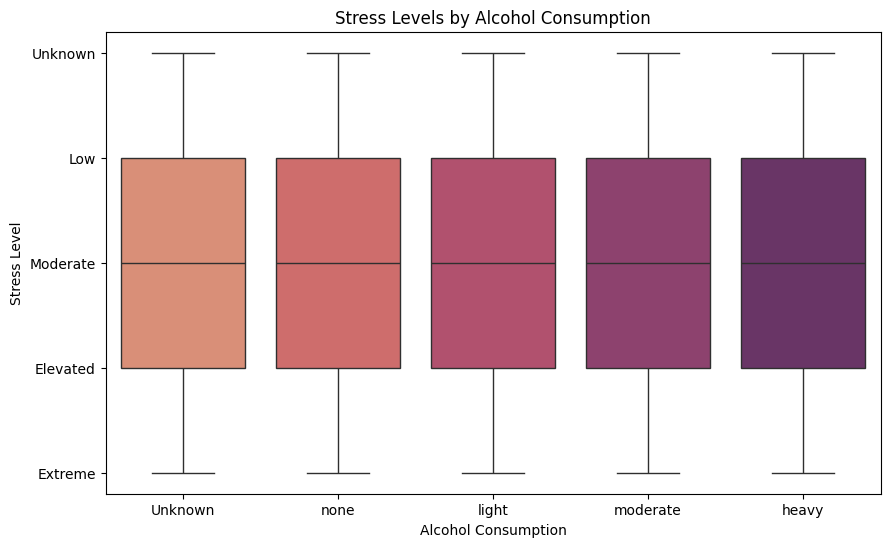

In [13]:
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=diabetes_cleaned,
    x='alcohol_consumption',
    y='stress_level',
    palette='flare',
    order=['Unknown', 'none', 'light', 'moderate', 'heavy']
)
plt.title('Stress Levels by Alcohol Consumption')
plt.xlabel('Alcohol Consumption')
plt.ylabel('Stress Level')
plt.show()

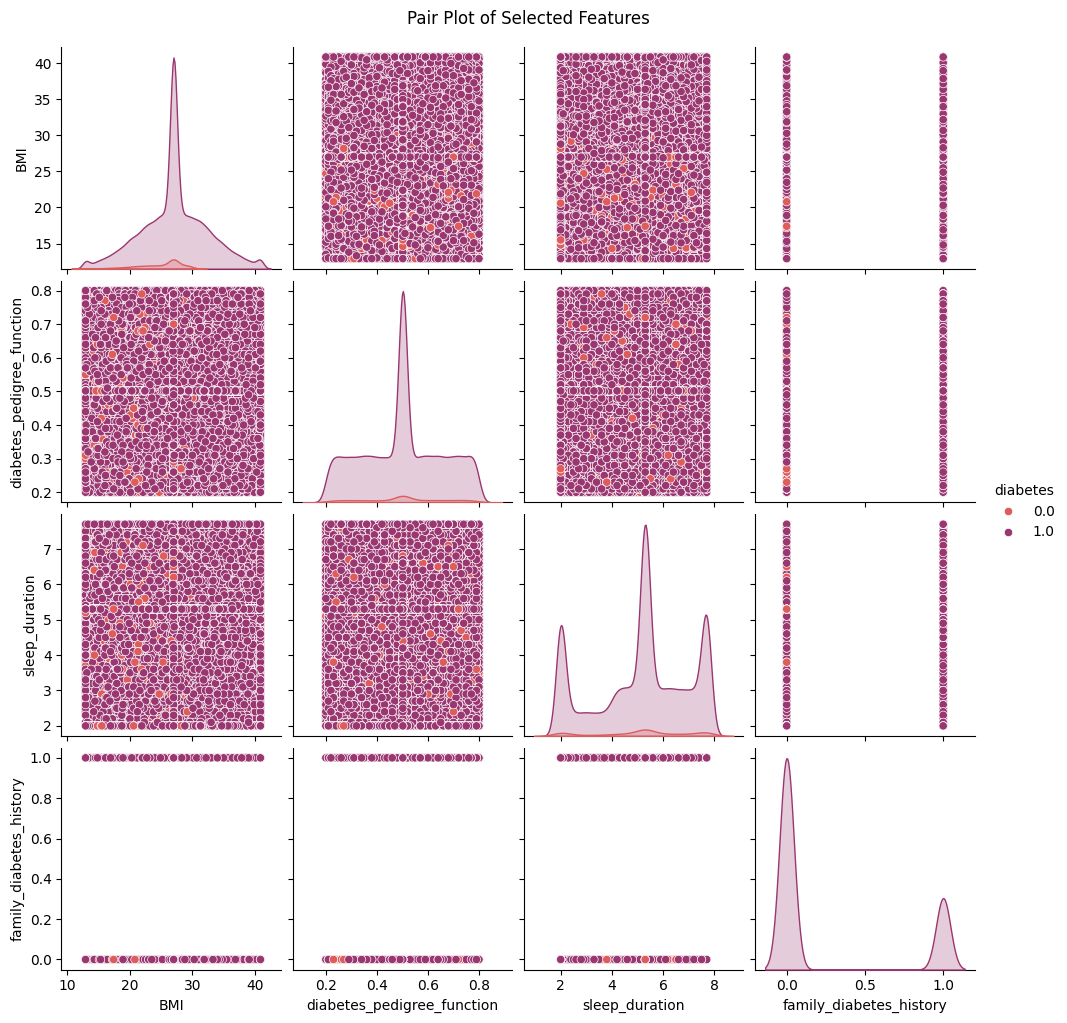

In [17]:
selected_features = ['BMI', 'stress_level', 'diabetes_pedigree_function', 'alcohol_consumption', 'sleep_duration', 'family_diabetes_history', 'age_group']
sns.pairplot(df[selected_features + ['diabetes']], hue='diabetes', palette='flare', diag_kind='kde')
plt.suptitle('Pair Plot of Selected Features', y=1.02)
plt.show()